In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import math
import tabulate as tb

# Ex1

In [23]:
def PolX(X, i):
    match i:
        case 0:
            return (X - X[1])*(X - X[2])/((X[0] - X[1])*(X[0] - X[2]))
        case 1:
            return (X - X[0])*(X - X[2])/((X[1] - X[0])*(X[1] - X[2]))
        case 2:
            return (X - X[0])*(X - X[1])/((X[2] - X[0])*(X[2] - X[1]))

N = 3
X = np.array([1,2,3])
Y = np.array([1,4,9])

V = np.zeros((N,N))

for i in range(N):
    V[i, :] = PolX(X, i)

print(V)

c = np.linalg.solve(V,Y)

print(c)

#|P0(X0)    P1(X0)    P2(X0)|   |C0|   |Y0|
#|P0(X1)    P1(X1)    P2(X1)| * |C1| = |Y1|
#|P0(X2)    P1(X2)    P2(X2)|   |C2|   |Y2|

#|(X0-X1)(X0-X2)/(X0-X1)(X0-X2)    (X0-X0)(X0-X2)/(X1-X0)(X1-X2)    (X0-X0)(X0-X1)/(X2-X0)(X2-X1)|   |C0|   |Y0|
#|(X1-X1)(X1-X2)/(X0-X1)(X0-X2)    (X1-X0)(X1-X2)/(X1-X0)(X1-X2)    (X1-X0)(X1-X1)/(X2-X0)(X2-X1)| * |C1| = |Y1|
#|(X2-X1)(X2-X2)/(X0-X1)(X0-X2)    (X2-X0)(X2-X2)/(X1-X0)(X1-X2)    (X2-X0)(X2-X1)/(X2-X0)(X2-X1)|   |C2|   |Y2|

#|1    0    0|   |C0|   |Y0|
#|0    1    0| * |C1| = |Y1|
#|0    0    1|   |C2|   |Y2|

#|C0|   |Y0|
#|C1| = |Y1|
#|C2|   |Y2|

#A vantagem de usar esse tipo de base é que os coeficientes podem ser facilmente calculados, pois equivalem aos seus respectivos Y
#Exemplo usado [(1,1),(2,4)(3,9)]:
#https://www.wolframalpha.com/input?i2d=true&i=plot+1+*+%5C%2840%29%5C%2840%29x-2%5C%2841%29Divide%5B%5C%2840%29x-3%5C%2841%29%2C%5C%2840%291-2%5C%2841%29%5C%2840%291-3%5C%2841%29%5D%5C%2841%29+%2B+4*%5C%2840%29%5C%2840%29x-1%5C%2841%29Divide%5B%5C%2840%29x-3%5C%2841%29%2C%5C%2840%292-1%5C%2841%29%5C%2840%292-3%5C%2841%29%5D%5C%2841%29+%2B+9*%5C%2840%29%5C%2840%29x-1%5C%2841%29Divide%5B%5C%2840%29x-2%5C%2841%29%2C%5C%2840%293-1%5C%2841%29%5C%2840%293-2%5C%2841%29%5D%5C%2841%29+from+x+%3D+0+to+3

[[ 1.  0.  0.]
 [-0.  1. -0.]
 [ 0.  0.  1.]]
[1. 4. 9.]


# Ex2

[-5.  -4.  -3.  -2.  -1.5 -1.  -0.5  0.   0.5  1.   2.   3.   4.   5. ] 14


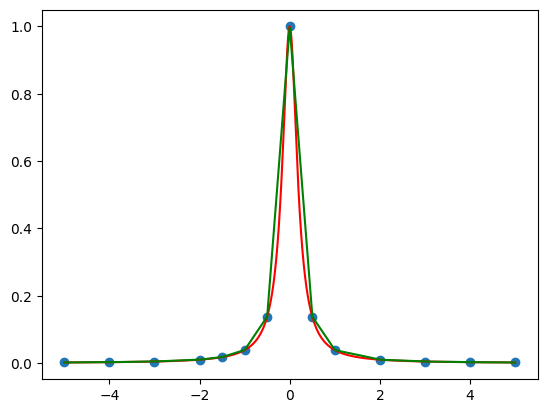

In [3]:
#Original
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# Interpolating points
xi = np.array([-5,-4,-3,-2,-1.5,-1,-0.5, 0, 0.5, 1, 2, 3, 4, 5])

print(xi, len(xi))
yi = R(xi)
# Define a set of points to evaluate the functions 
xeval = np.linspace(-5, 5, 2000) 
yeval = R(xeval) 
# Compute the piecewise liner polynomial 
ylin = interp1d(xi, yi, kind='linear') 
# Plot everything 
plt.plot(xi, yi, 'o', xeval, yeval, '-r', xeval, ylin(xeval), '-g')
plt.show()

[-5.00000000e+00 -3.00000000e+00 -1.53550943e+00 -6.47448205e-01
 -1.91632267e-01 -2.38775529e-02  2.31744618e-10  2.41844545e-02
  1.92859872e-01  6.50210315e-01  1.54041985e+00  3.00767253e+00
  5.00000000e+00  5.19615242e+00] 14


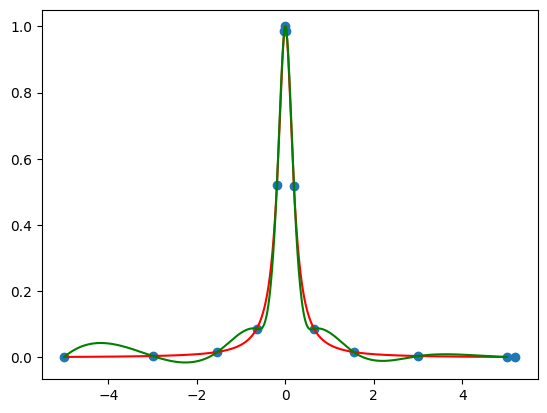

In [28]:
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# Interpolating points
xi = np.linspace(-(3)**(1/3), (3)**(1/2), 12, dtype=float)
xi = xi**3
xi = np.append(xi, [-5, 5])
xi = np.unique(xi)
xi = np.sort(xi)

print(xi, len(xi))
yi = R(xi)
# Define a set of points to evaluate the functions 
xeval = np.linspace(-5, 5, 2000) 
yeval = R(xeval) 
# Compute the piecewise liner polynomial 
ylin = interp1d(xi, yi, kind='cubic') 
# Plot everything 
plt.plot(xi, yi, 'o', xeval, yeval, '-r', xeval, ylin(xeval), '-g')
plt.show()

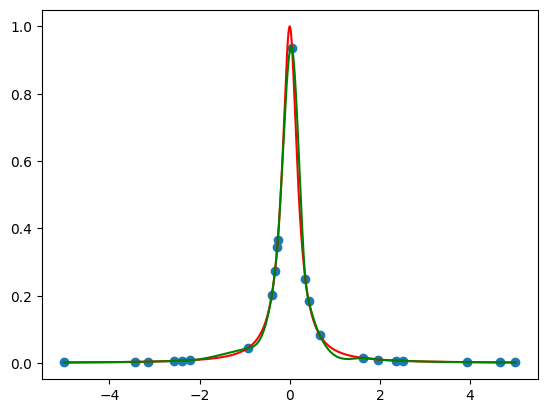

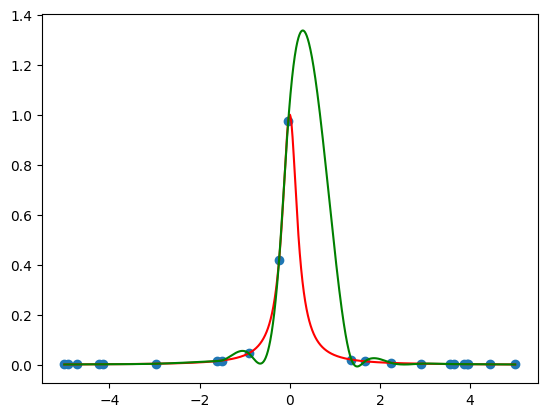

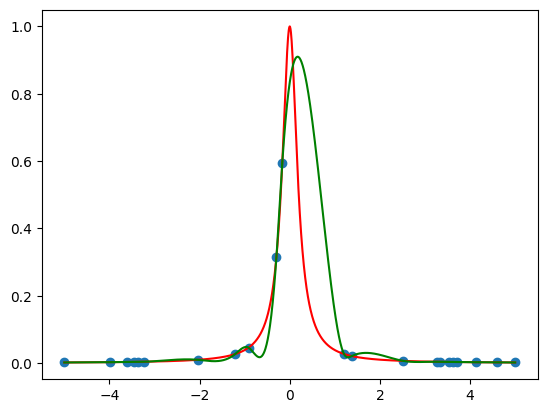

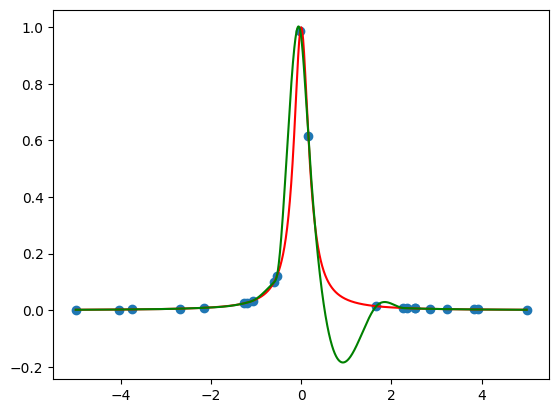

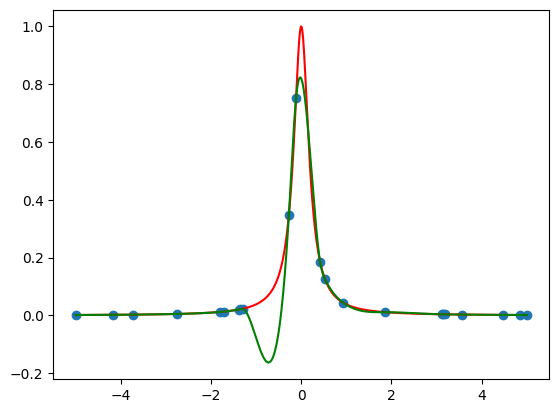

In [93]:
qtd = 5
pontos = 10

# Define a set of points to evaluate the functions 
xeval = np.linspace(-5, 5, 2000) 
yeval = R(xeval) 

for i in range(qtd):
    xi = np.concatenate((np.random.rand(pontos) * -5, np.random.rand(pontos) * 5))
    xi = np.append(xi, [-5, 5])
    xi = np.unique(xi)
    xi = np.sort(xi)
    
    #print(xi, len(xi))
    yi = R(xi)

    # Compute the piecewise liner polynomial 
    ylin = interp1d(xi, yi, kind='cubic') 
    
    # Plot everything 
    plt.plot(xi, yi, 'o', xeval, yeval, '-r', xeval, ylin(xeval), '-g')
    plt.show()

# Ex4

In [41]:
arq = open("data.txt", "r")
dadosS = arq.read().split("\n")
arq.close()

for i in range(len(dadosS)):
    if dadosS[i] == "":
        dadosS.pop(i)

dados = np.zeros((len(dadosS), 4))

for i in range(len(dadosS)):
    dados[i] = dadosS[i].split(" ")

dadosOrdenados = dados[dados[:, 0].argsort()]
dadosOrdenados2 = dados[dados[:, 1].argsort()]

N = len(dados)

In [48]:
dados = np.loadtxt("data.txt", dtype='f', delimiter=' ')
N = len(dados)

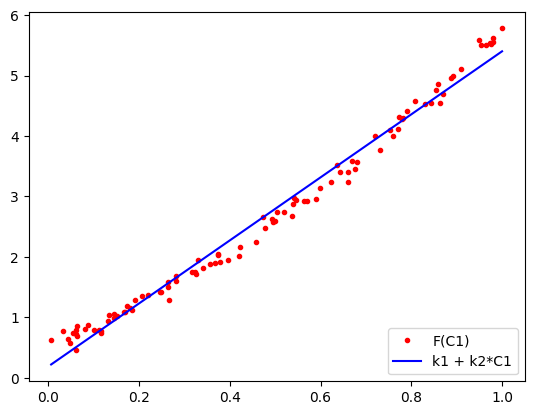

In [33]:
#Caso 1
A = np.zeros((N, 2))
A[:,0] = 1
A[:,1] = dados[:,0]

At = np.transpose(A)
B = At.dot(A)

y = np.zeros(N)
y[:] = dados[:,2]

Consts = np.linalg.solve(B, (At @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)

Ks = [Consts[1], Consts[0]]
y = np.polyval(Ks, x)

linha = plt.plot(dadosOrdenados[:,0], dadosOrdenados[:,2], '.r')
plt.plot(x, y, '-b')
plt.legend(["F(C1)", "k1 + k2*C1"], loc="lower right")
plt.show()

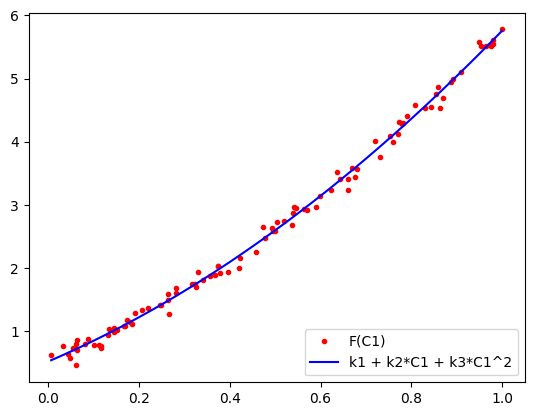

In [34]:
#Caso 2
A = np.zeros((N, 3))
A[:,0] = 1
A[:,1] = dados[:,0]
A[:,2] = dados[:,0]**2

At = np.transpose(A)
B = At.dot(A)

y = np.zeros(N)
y[:] = dados[:,2]

Consts = np.linalg.solve(B, (At @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)

Ks = [Consts[2], Consts[1], Consts[0]]
y = np.polyval(Ks, x)

plt.plot(dadosOrdenados[:,0], dadosOrdenados[:,2], '.r')
plt.plot(x, y, '-b')
plt.legend(["F(C1)", "k1 + k2*C1 + k3*C1^2"], loc="lower right")
plt.show()

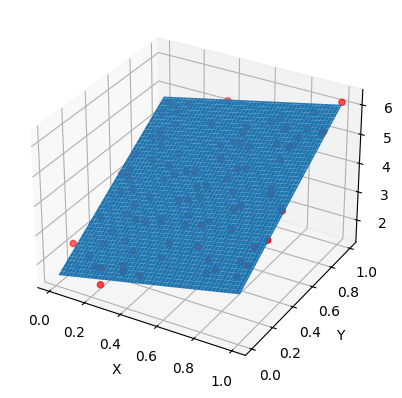

In [81]:
#Caso 3
A = np.zeros((N, 3))
A[:,0] = 1
A[:,1] = dados[:,0]
A[:,2] = dados[:,1]

At = np.transpose(A)
B = At.dot(A)

y = np.zeros(N)
y[:] = dados[:,3]

Consts = np.linalg.solve(B, (At @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)
y = np.linspace(min(dados[:,1]), max(dados[:,1]), N)

x = np.tile(x, (N, 1))
y = np.tile(y, (N, 1)).T

z = Consts[0] + x * Consts[1] + y * Consts[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(dadosOrdenados[:,0], dadosOrdenados[:,1], dadosOrdenados[:,3], color = 'red')
ax.plot_surface(x,y,z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x,y)')

plt.show()

# Ex 5

In [9]:
def Media(x1, x2):
    return (x1 + x2)/2

def CalcularIntegrais(N, a, b, funcao):
    res = []

    for n in N:
        dist = (b-a)/n
        X = a + np.arange(1, n+1) * dist
        Xm = Media(X - dist, X)

        resPM = dist * sum(funcao(Xm))
        resT = dist/2 * sum(funcao(X-dist) + funcao(X))
        resS = dist/6 * sum(funcao(X-dist) + 4*funcao(Xm) + funcao(X))

        res.append([resPM, resT, resS])

    return np.array(res)

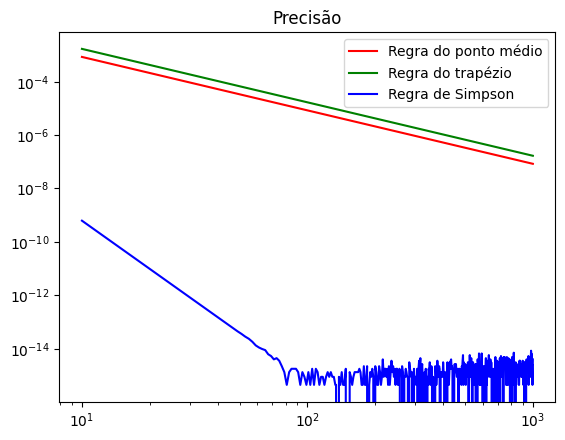

In [10]:
def Func5(x):
    return 4/(1 + x**2)

qtd = 500
N = np.linspace(10, 10**3, qtd, dtype=int)

erros = CalcularIntegrais(N, 0, 1, Func5)

for i in range(len(erros)):
    for j in range(len(erros[0])):
        erros[i,j] = abs(math.pi - erros[i,j])

plt.loglog(N, erros[:,0], "-r")
plt.loglog(N, erros[:,1], "-g")
plt.loglog(N, erros[:,2], "-b")
plt.title("Precisão")
plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()

# Ex 6

In [11]:
def Assembly(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    #Soma-se 1 porque, se o maior nó é o 72, então ele precisa de 73 espaços (pois o primeiro é o 0)
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1
    #Quantidade de canos = número de ligações = tamanho da lista de Condutâncias
    nc = len(C)
    A = np.zeros(shape=(nv,nv))
    #Para cada cano
    for k in range(nc):
        #Pega os nós conectados
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        #Salva na matriz A os valores da condutância do cano de acordo com os nós respectivos
        A[n1, n1] += C[k]
        A[n1, n2] += -C[k]
        A[n2, n1] += -C[k]
        A[n2, n2] += C[k]

    return A

#Para calcular as pressões de cada nó e vazões de cada cano
def SolveNetwork(conec, C, natm, nB, QB, imprimir):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1

    #Pega a matriz A
    Atilde = Assembly(conec, C)
    #Altera a linha do nó de saída da massa
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1

    #Cria a matriz de variação da massa
    b = np.zeros(shape=nv)
    #Salva em qual nó está entrando massa externa
    b[nB] = QB

    #Resolve a matriz, assumindo Ã como dados, b como resultados e calculando o vetor de pressões intermediário
    pressure = np.linalg.solve(Atilde, b)

    #Para não desacelerar desnecessariamente o último exercício
    if imprimir:
        print("Ã = ", Atilde, "\n\nb = ", b, "\n\nPressão = ", pressure)
    return pressure

def CalcularPotencia(p, D, K):
    pT = np.transpose(p)
    Dt = np.transpose(D)
    aux = Dt.dot(K).dot(D)
    W = pT.dot(aux).dot(p)
    return W

def GeraRede(nx,ny, CH, CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j*nx
            coord[ig,0] = i
            coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
            k = j*(nx-1) + i
            conec[k,0] = j*nx + i
            conec[k,1] = j*nx + i+1
            C[k] = CH
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny-1):
            k = (nx-1)*ny + j*nx + i
            conec[k,0] = i + j*nx
            conec[k,1] = i + (j+1)*nx
            C[k] = CV

    return nv, nc, conec, C, coord

def PlotPressure(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

In [12]:
def FormarK(C):
    nc = len(C)
    K = np.zeros(shape=(nc,nc))
    #Salva o valor de cada condutância de acordo com o cano relacionado
    for k in range(nc):
        K[k, k] = C[k]

    return K

#Calcular a matrix de fluxo
def FormarD(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1
    nc = len(C)

    #Como a matriz define quais nós são a entrada e saída de cada cano,
    #ela possui uma linha pra cada cano, uma coluna pra cada nó
    D = np.zeros(shape=(nc,nv))
    for k in range(nc):
        #Pega os nós do cano
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        D[k,n1] = 1
        D[k,n2] = -1

    return D

def Potencia(X):
    n, m = 8, 9
    QB = 3
    nAtm = n*m - 1
    nB = 0
    W = []
    for x in X:
        CH = 2.3 + 10*pow(math.e, -pow(x - 5, 2))
        CV = 1.8 + 10*pow(math.e, -pow(x - 5, 2))
        nv, nc, conec, C, coord = GeraRede(n, m, CH, CV)
        
        p = SolveNetwork(conec, C, nAtm, nB, QB, False)
        
        K = FormarK(C)
        D = FormarD(conec, C)
        
        pT = np.transpose(p)
        Dt = np.transpose(D)
        aux = Dt.dot(K).dot(D)
        W.append(pT.dot(aux).dot(p))
        
    return np.array(W)

def ShowPotencia():
    div = np.linspace(1, 10, 100)
    plt.plot(div, Potencia(div), "-m")
    plt.title("Potencia")
    plt.show()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


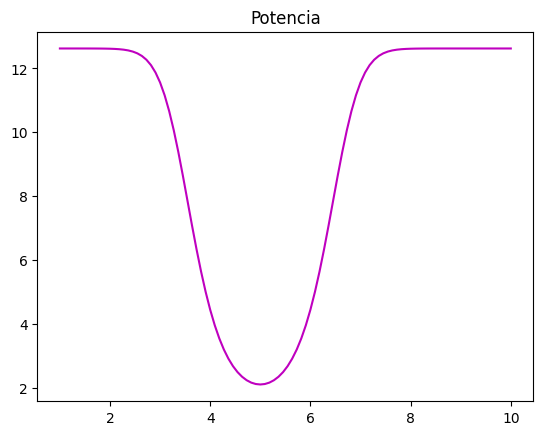


|    |   Tamanho (N) |   Energia (Ponto médio) |   Energia (Trapézio) |   Energia (Simpson) |
|----|---------------|-------------------------|----------------------|---------------------|
|  0 |             1 |                 23.2437 |             113.597  |             53.3613 |
|  1 |             2 |                102.64   |              68.4201 |             91.2336 |
|  2 |             3 |                 83.1136 |              85.8732 |             84.0335 |
|  3 |             4 |                 84.1596 |              85.5302 |             84.6165 |
|  4 |             5 |                 84.0437 |              84.9266 |             84.338  |
|  5 |             6 |                 84.643  |              84.4934 |             84.5931 |
|  6 |             7 |                 85.0152 |              84.1125 |             84.7143 |
|  7 |             8 |                 84.2861 |              84.8449 |             84.4724 |
|  8 |             9 |                 84.544  |           

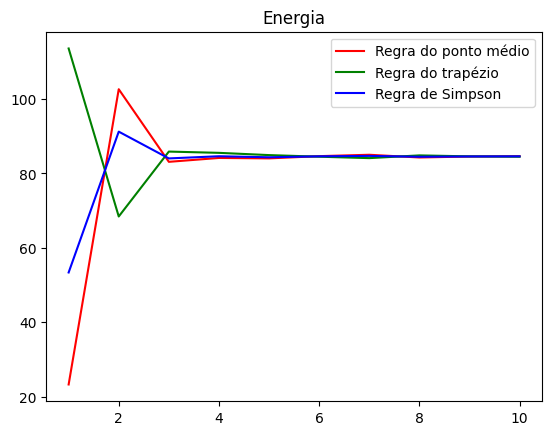

In [13]:
N = np.linspace(1, 10, 10)
#N = np.append(N,1000)
print(N)
energias = CalcularIntegrais(N, 1, 10, Potencia)

ShowPotencia()

print()
print(tb.tabulate(np.column_stack((N, energias[:,0], energias[:,1], energias[:,2])), 
                  headers=["Tamanho (N)","Energia (Ponto médio)","Energia (Trapézio)","Energia (Simpson)"], 
                  tablefmt="github", showindex="always"))
print()

plt.plot(N, energias[:,0], "-r")
plt.plot(N, energias[:,1], "-g")
plt.plot(N, energias[:,2], "-b")
plt.title("Energia")
plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()

# Ex 7

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


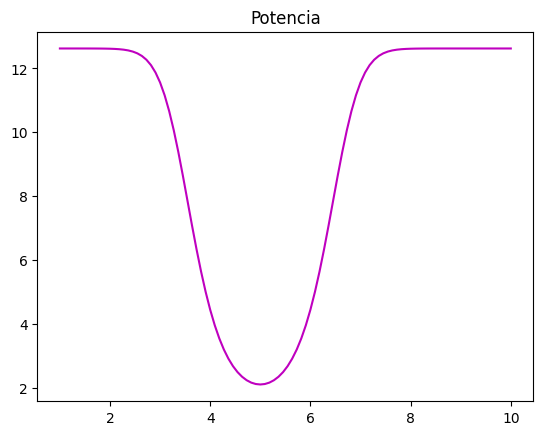

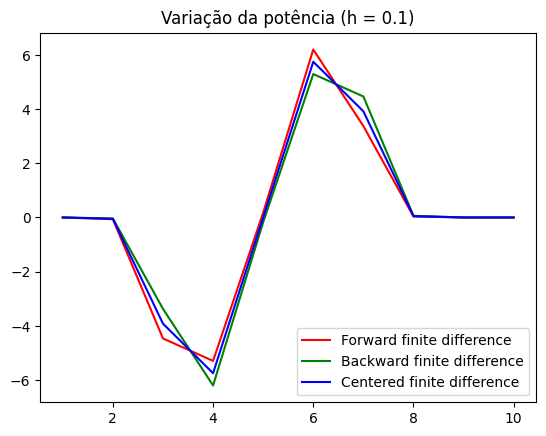

In [14]:
def Derivadas(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist
    resB = (funcao(x) - funcao(x - dist))/dist
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return [resF, resB, resC]

x = np.linspace(1, 10, 10)
print(x)
dist = 1e-1

res = Derivadas(x, Potencia, dist)

ShowPotencia()

plt.plot(x, res[0], "-r")
plt.plot(x, res[1], "-g")
plt.plot(x, res[2], "-b")
plt.title("Variação da potência (h = 0.1)")
plt.legend(["Forward finite difference", "Backward finite difference", "Centered finite difference"], loc="lower right")
plt.show()

# Ex 8

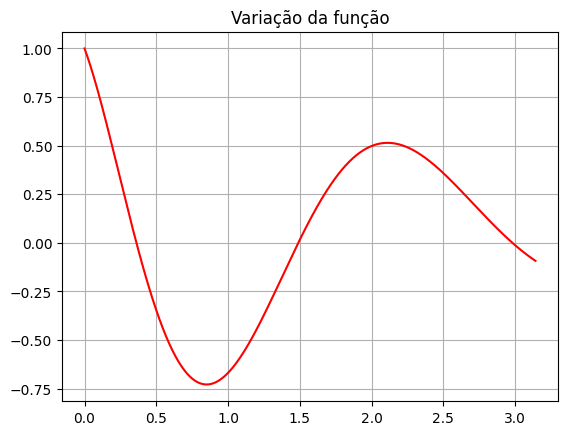

In [15]:
def Func8(x):
    return x * pow(math.e, -x) * np.cos(2*x)

def DerivadaDaFunc8(x):
    return pow(math.e, -x) * (-(-1 + x) * np.cos(2*x) - 2 * x * np.sin(2*x))

#Letra A
X = np.linspace(0, math.pi, 10000)

res = DerivadaDaFunc8(X)

plt.plot(X, res, "-r")
plt.title("Variação da função")
plt.grid()
plt.show()

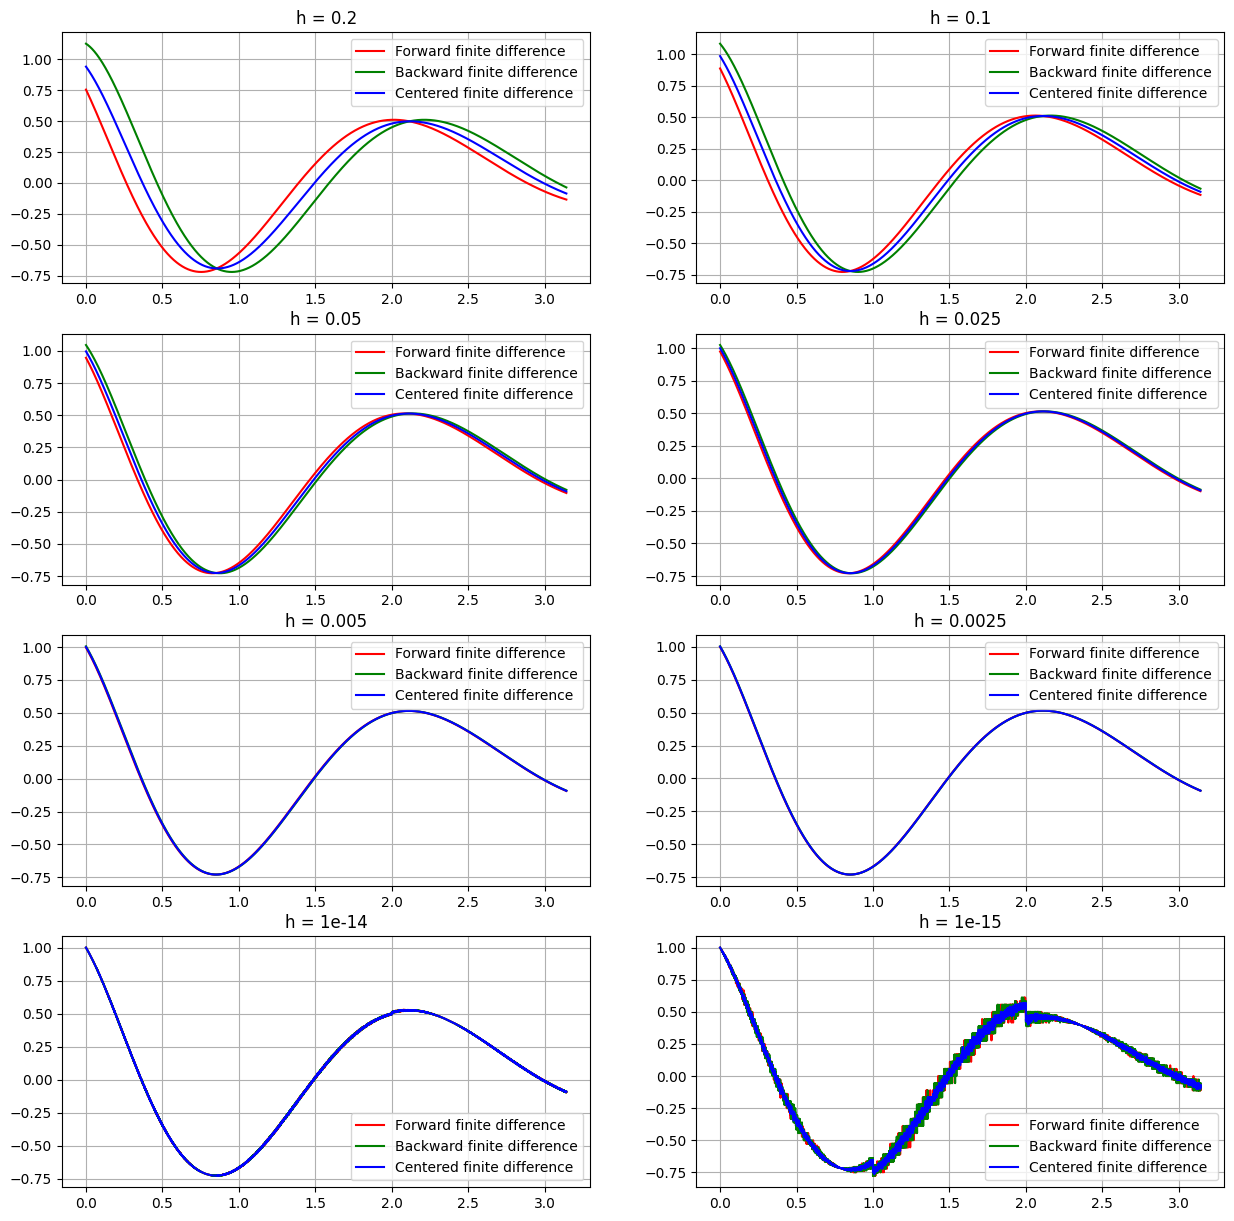

In [16]:
#Letra B
X = np.linspace(0, math.pi, 10000)
h = [[0.2,0.1],[0.05,0.025],[0.005,0.0025],[1e-14, 1e-15]]

fig, ax = plt.subplots(len(h),len(h[0]))

fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(len(h)):
    for j in range(len(h[i])):
        res = Derivadas(X, Func8, h[i][j])
        ax[i,j].plot(X, res[0], "-r", label="Forward finite difference")
        ax[i,j].plot(X, res[1], "-g", label="Backward finite difference")
        ax[i,j].plot(X, res[2], "-b", label="Centered finite difference")
        ax[i,j].title.set_text("h = " + str(h[i][j]))
        ax[i,j].grid()
        ax[i,j].legend()

plt.show()

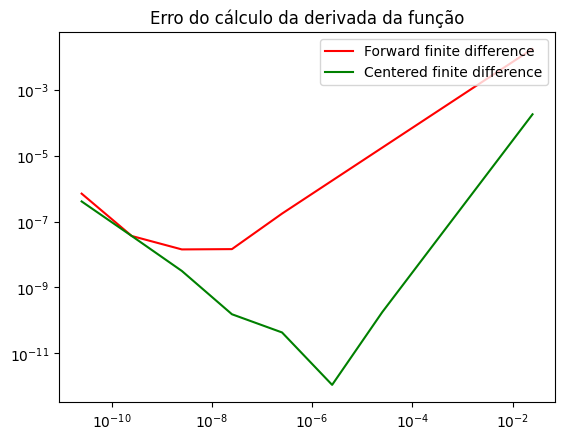

In [17]:
#Letra C
k = np.linspace(1, 10, 10)
h = 0.25/pow(10, k)
x = np.pi/2

res1 = DerivadaDaFunc8(x)
res2 = Derivadas(x, Func8, h)

err1 = abs(res1 - res2[0])
err2 = abs(res1 - res2[2])

plt.loglog(h, err1, "-r", label="Forward finite difference")
plt.loglog(h, err2, "-g", label="Centered finite difference")
plt.title("Erro do cálculo da derivada da função")
plt.legend(loc="upper right")
plt.show()

#Conforme o h diminui, a derivada vai ganhando mais precisão
#No entanto, para h muito pequeno a precisão diminui, provavelmente devido à erros ao lidar com o ponto flutuante muito pequeno

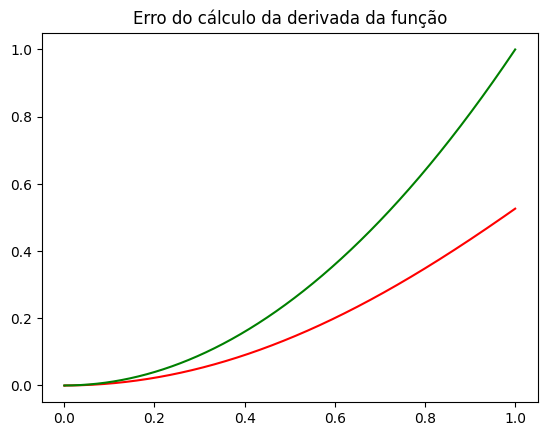

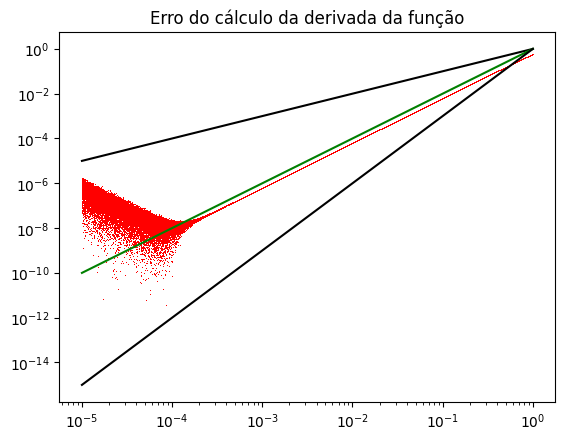

In [20]:
def DerivadaBonus(x, h):
    return (Func8(x + h) - 2 * Func8(x) + Func8(x - h))/pow(h, 2)

def DerivadaSegunda(x):
    return pow(np.e, -x) * (-(2 + 3*x) * np.cos(2*x) + 4 * (-1 + x) * np.sin(2*x))

#Letra D
h = np.logspace(-5, 0, 100000)
x = np.pi/2

res1 = DerivadaSegunda(x)
res2 = DerivadaBonus(x, h)

err = abs(res1 - res2)

plt.plot(h, err, "-r")
plt.title("Erro do cálculo da derivada da função")
plt.plot(h, pow(h, 2), "-g")
plt.show()

plt.loglog(h, err, ",r")
plt.loglog(h, h, "-k")
plt.loglog(h, pow(h, 2), "-g")
plt.loglog(h, pow(h, 3), "-k")
plt.title("Erro do cálculo da derivada da função")
plt.show()